# Chapter 5 - Heterogeneity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
maf = pd.read_csv('inputs/MAF_BRCA_2015.maf',sep='\t')
maf.head(3)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,DOMAINS,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
0,PTGER3,5733,genome.wustl.edu;unc.edu,GRCh37,1,71512366,71512366,+,"missense_variant,splice_region_variant",Missense_Mutation,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0000...",NaN,probably_damaging(0.997),ENSP00000349003,L/V,CCDS655.1,NaN,C,1106/1943,NaN
1,FLG,2312,genome.wustl.edu;unc.edu,GRCh37,1,152285981,152285981,+,missense_variant,Missense_Mutation,...,"Low_complexity_(Seg):Seg,PROSITE_profiles:PS50324",NaN,probably_damaging(0.988),ENSP00000357789,R/W,CCDS30860.1,NaN,A,1417/12747,NaN
2,GPR52,9293,genome.wustl.edu,GRCh37,1,174417411,174417411,+,synonymous_variant,Silent,...,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",NaN,NaN,ENSP00000356658,I,CCDS30941.1,NaN,A,200/1472,NaN


### Mutations Per Gene

In [10]:
mutationsPerGene = dict(maf['Hugo_Symbol'].value_counts())
mutationsPerGeneValues = list(mutationsPerGene.values())
q1 = np.quantile(mutationsPerGeneValues, .25)
q2 = np.quantile(mutationsPerGeneValues, .50)
q3 = np.quantile(mutationsPerGeneValues, .75)
avg = np.average(mutationsPerGeneValues)

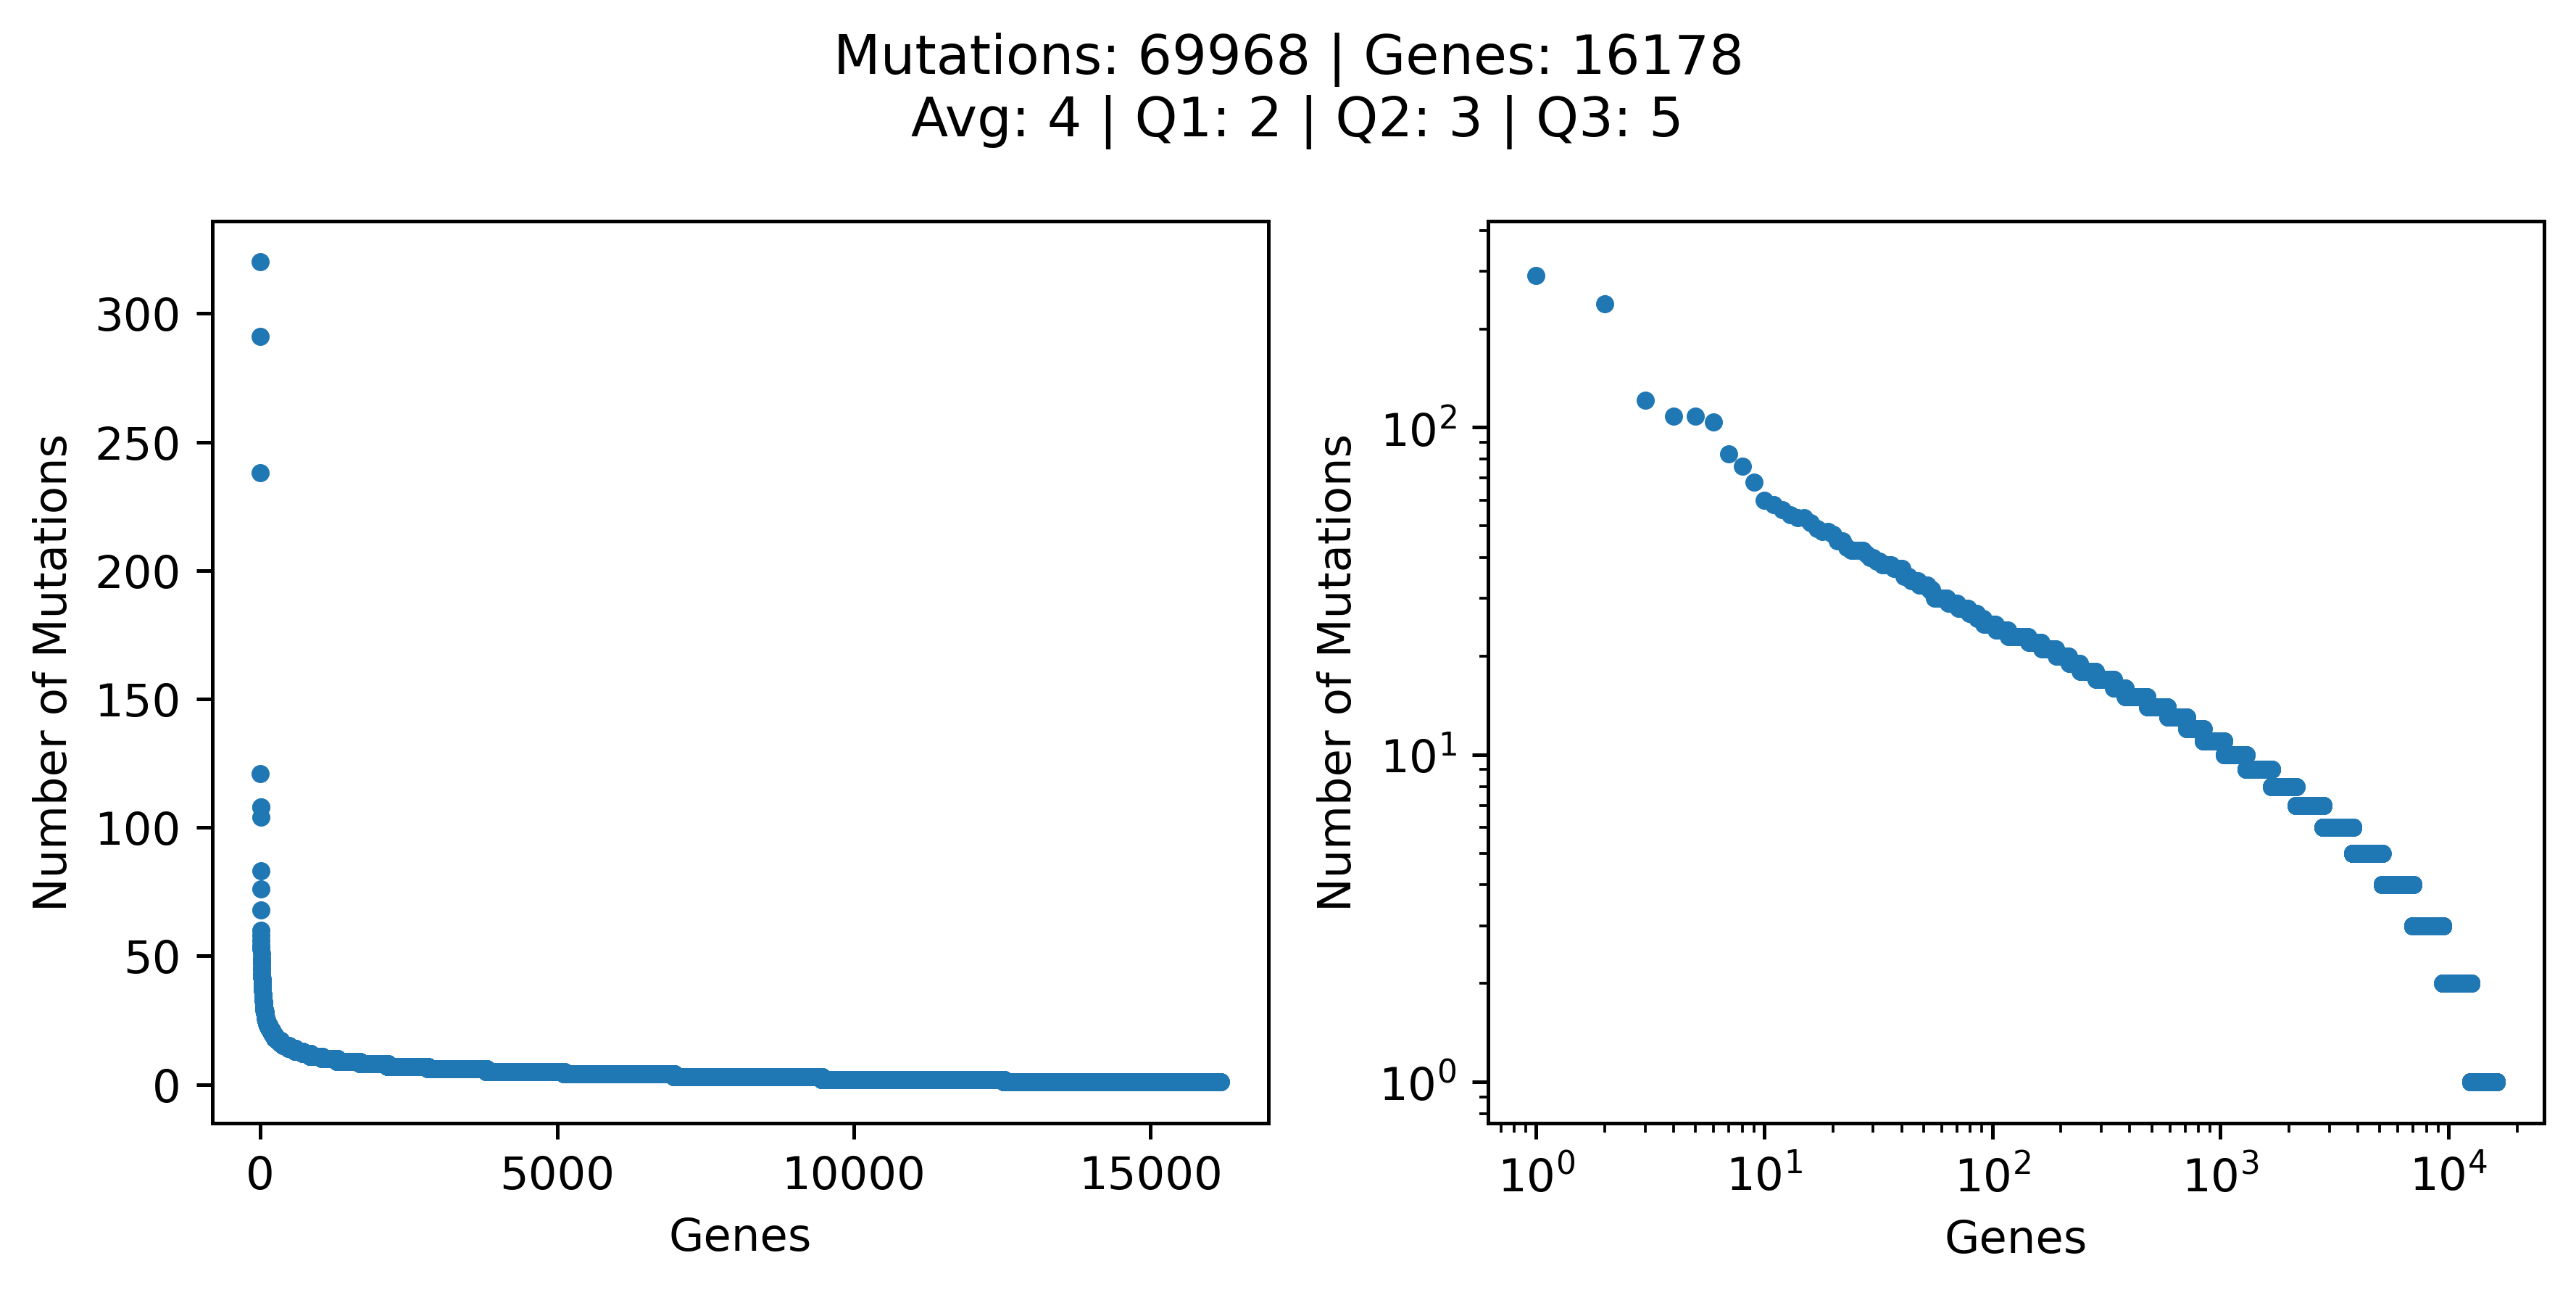

In [11]:
plt.figure(figsize=(8,4),dpi=450) 
plt.subplot(1,2,1)
plt.plot(mutationsPerGene.values(),'.')
plt.xlabel('Genes')
plt.ylabel('Number of Mutations')
plt.subplot(1,2,2)
plt.loglog(mutationsPerGene.values(),'.')
plt.xlabel('Genes')
plt.ylabel('Number of Mutations')
plt.suptitle('Mutations: '+str(maf.shape[0])+' | Genes: '+str(len(mutationsPerGene.keys())) +'\n Avg: '+str(round(avg)) + ' | Q1: '+str(round(q1)) + ' | Q2: '+str(round(q2)) +' | Q3: '+str(round(q3)))
plt.tight_layout()
plt.savefig("ouput/5 MutationPerGene.pdf", format='pdf')
plt.show()

### Mutations Per Sample

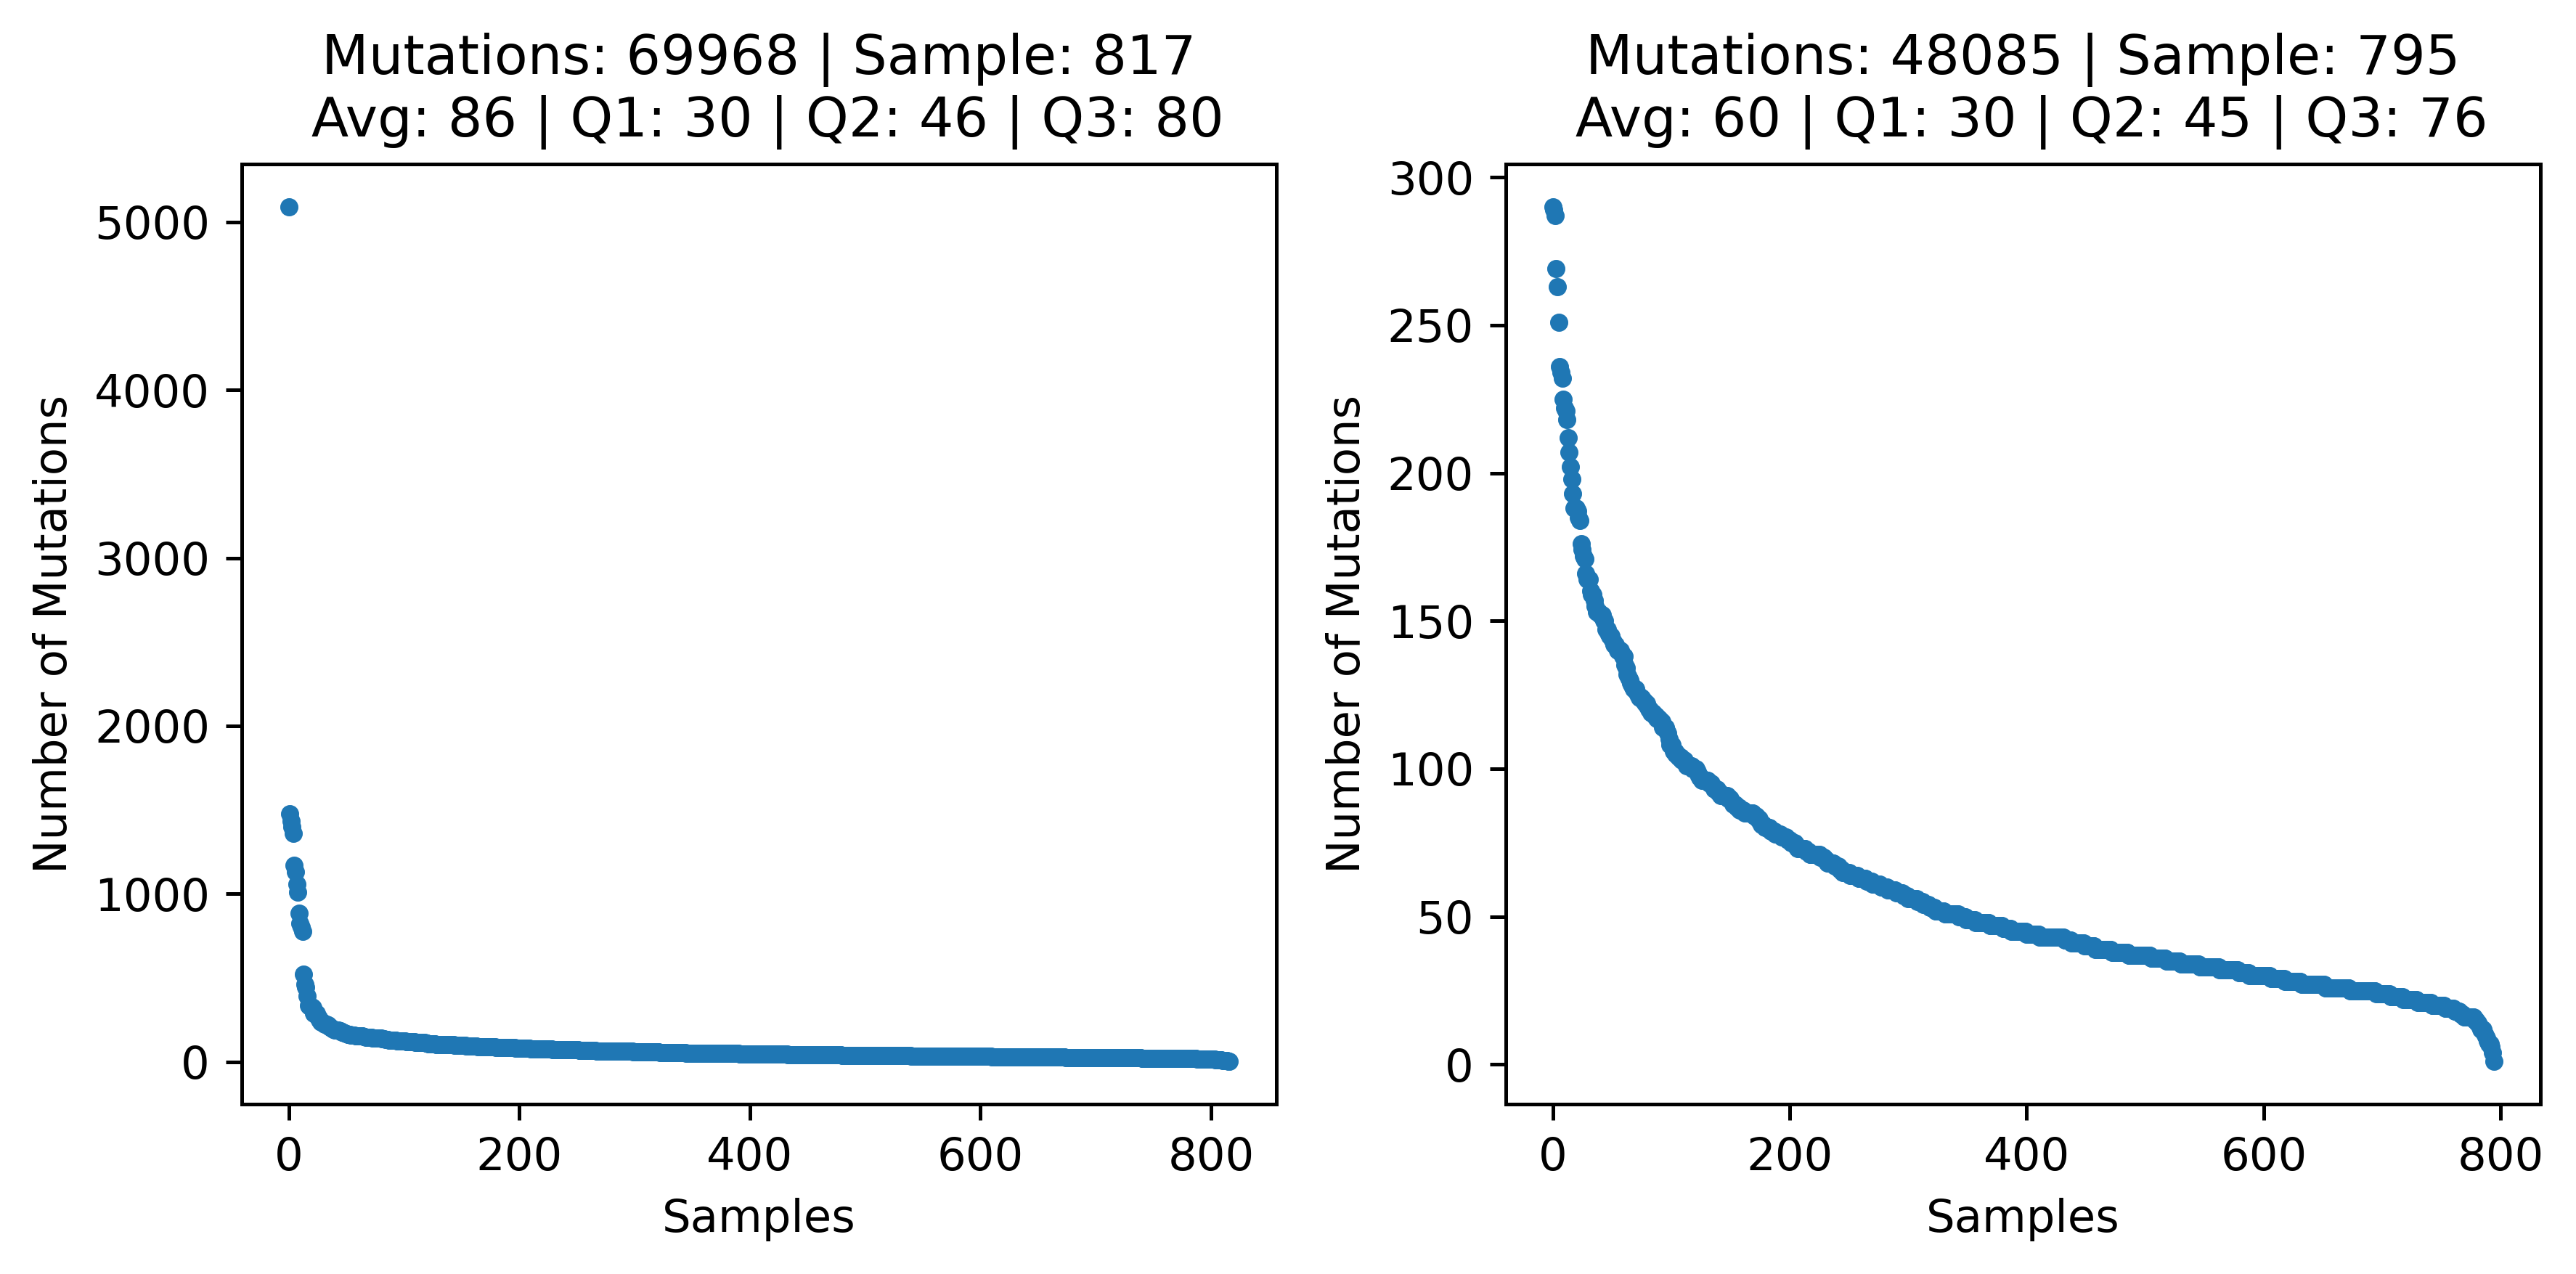

In [12]:
plt.figure(figsize=(8,4),dpi=450) 
mutations_per_patient = dict(maf['Tumor_Sample_Barcode'].value_counts())
mutations_per_patientValues = list(mutations_per_patient.values())

#Normal
q1 = np.quantile(mutations_per_patientValues, .25)
q2 = np.quantile(mutations_per_patientValues, .50)
q3 = np.quantile(mutations_per_patientValues, .75)
avg = np.average(mutations_per_patientValues)

plt.subplot(1,2,1)
plt.plot(mutations_per_patient.values(),'.')
plt.xlabel('Samples')
plt.ylabel('Number of Mutations')
plt.title('Mutations: '+str(maf.shape[0])+' | Sample: '+str(len(mutations_per_patient.keys())) +'\n Avg: '+str(round(avg)) + ' | Q1: '+str(round(q1)) + ' | Q2: '+str(round(q2)) +' | Q3: '+str(round(q3)))

#Without hypermutated
iqr = q3 - q1
threshold_hm = q3 + 4.5*iqr
mutations_per_patient_filtered = dict(filter(lambda elem: elem[1] <= threshold_hm, mutations_per_patient.items()))
mutations_per_patient_filtered_values= list(mutations_per_patient_filtered.values())

q1 = np.quantile(mutations_per_patient_filtered_values, .25)
q2 = np.quantile(mutations_per_patient_filtered_values, .50)
q3 = np.quantile(mutations_per_patient_filtered_values, .75)
avg = np.average(mutations_per_patient_filtered_values)

plt.subplot(1,2,2)
plt.plot(mutations_per_patient_filtered_values,'.')
plt.xlabel('Samples')
plt.ylabel('Number of Mutations')
maf_filtered = maf[maf['Tumor_Sample_Barcode'].isin(mutations_per_patient_filtered.keys())]
plt.title('Mutations: '+str(maf_filtered.shape[0])+' | Sample: '+str(len(mutations_per_patient_filtered.keys())) +'\n Avg: '+str(round(avg)) + ' | Q1: '+str(round(q1)) + ' | Q2: '+str(round(q2)) +' | Q3: '+str(round(q3)))

#end
plt.tight_layout()
plt.savefig("ouput/5 MutationPerSample.pdf", format='pdf')
plt.show()

In [6]:
bmm = pd.crosstab(maf_filtered.Tumor_Sample_Barcode, maf_filtered.Hugo_Symbol).clip(upper=1)

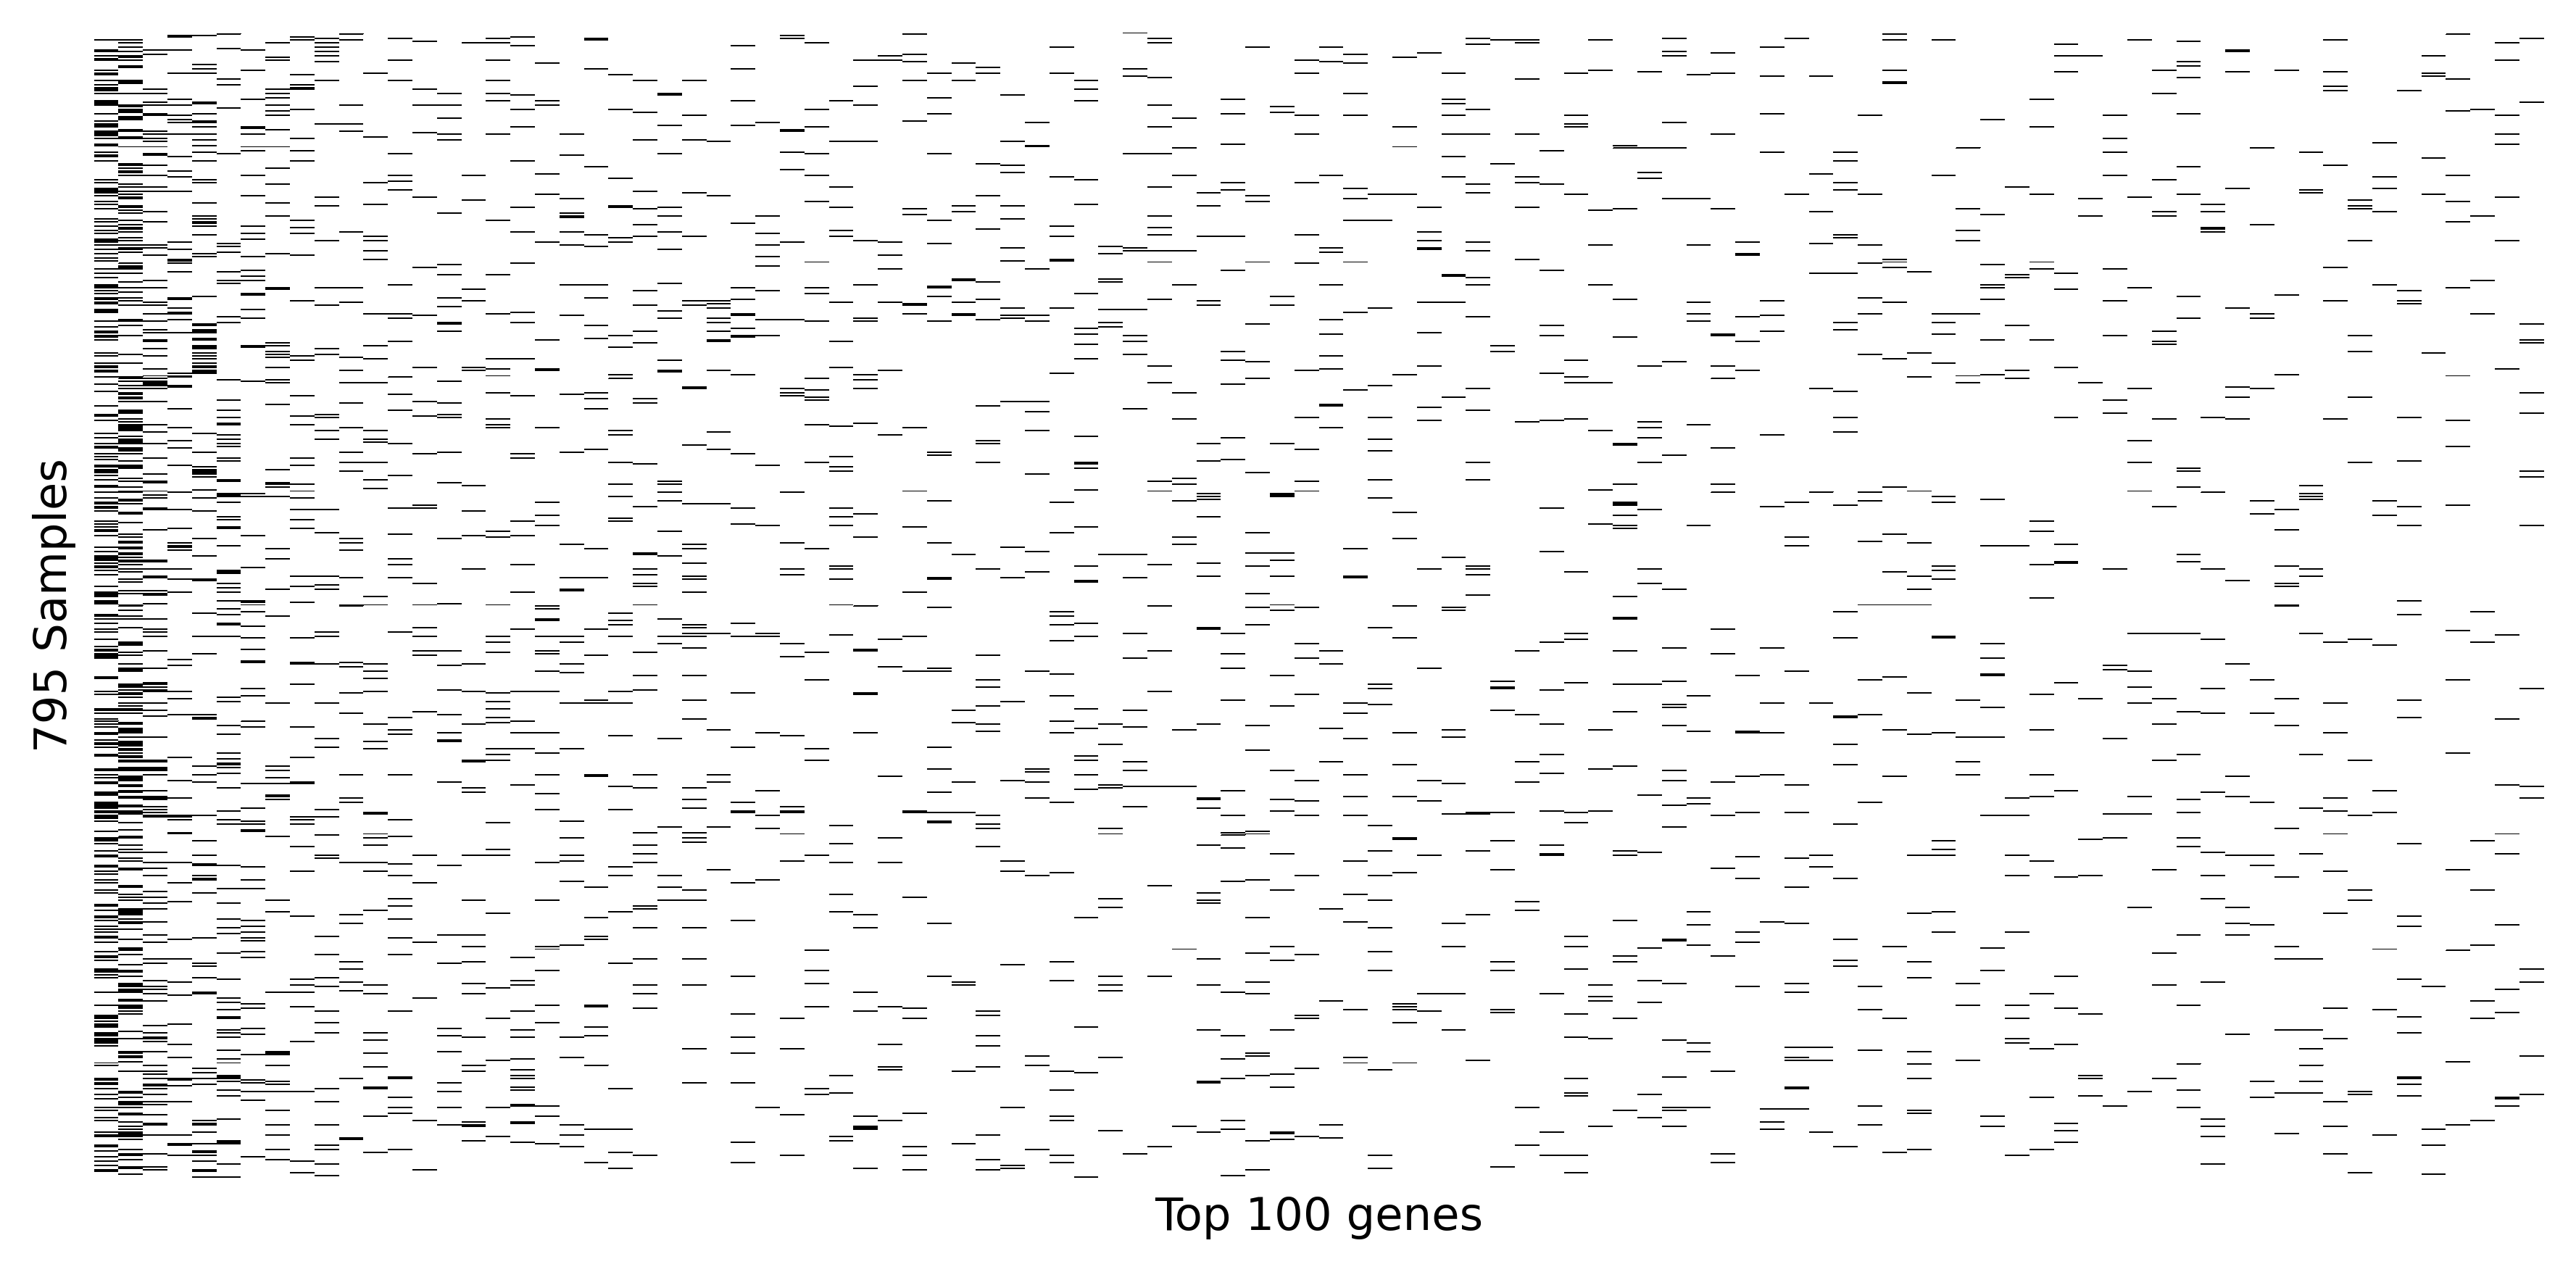

In [9]:
plt.figure(figsize=(8,4),dpi=450) 
sn.heatmap(bmm[list(mutationsPerGene.keys())[:100]],cmap='gray_r',cbar=False,yticklabels=False,xticklabels=False,linewidths=0, linecolor='white')
plt.xlabel("Top 100 genes") 
plt.ylabel("795 Samples") 
plt.tight_layout()
plt.savefig("ouput/5 Top100Genes.pdf", format='pdf')
plt.show()